# CSCI 184 Machine Learning Final Project: Inflation Detector
# Group Members: Arjun Chimni, Patrick Callahan, Andrew Schulz


## Project Idea: 	
  >With the recent CPI numbers coming out and a recession on the loom, we wanted to identify what conditions cause inflation before the inflation happens. We think that this topic is especially pertinent at the current moment. We want to identify the features/conditions under which inflation happens and try to predict if there will be inflation to the money supply. 
  
  >To do this, we will analyze employment data, CPI (consumer price index), PPI (producer price index), and confidence indexes in order to obtain an idea about what causes inflation and how to detect it early. We will train historical data of all these features to draw conclusions.
  
  > Ideally, the program will be able to suggest some sort of action in order to combat inflation or just general advice for the average consumer heading into a high inflation landscape.



## Step 1: Upload the the .csv files that we will be using for the project
> Here we used data from the following sources: 
* https://www.kaggle.com/datasets/varpit94/us-inflation-data-updated-till-may-2021 : U.S. Inflation Data
* https://www.kaggle.com/datasets/federalreserve/interest-rates : Federal Reserve INterest Rates (1954-Present)
* https://www.kaggle.com/datasets/ambrosm/oecd-consumer-confidence-index : OECD Consumer Confidence Index
    

In [2]:
import pandas as pd
import csv

#opening the data and initializing the variables associated with the data. 
inflation_dt = pd.read_csv("US CPI.csv")
fed_res_inrts = pd.read_csv("index.csv")
cus_conf_index = pd.read_csv("cus_conf_index.csv")


In [3]:
# Now we want to initially convert the data into a dataframe so we can explore how we should begin preprocessing the data. 

inflation_dt_df = pd.DataFrame(data = inflation_dt)
fed_res_inrts_df = pd.DataFrame(data = fed_res_inrts)
cus_conf_index_df = pd.DataFrame(data = cus_conf_index)

In [4]:
# Now that the data is of the dataframe type, we can explore the features and understand the target variable that we are looking to predict
print("These are the columns and datatypes for 'U.S. Inflation Data' dataset: ")
print(inflation_dt_df.dtypes)
print("The shape of the dataframe is: ", inflation_dt_df.shape)
print()
print("These are the columns and datatypes for 'Federal Reserve INterest Rates (1954-Present)' dataset: ")
print(fed_res_inrts_df.dtypes)
print("The shape of the dataframe is: ", fed_res_inrts_df.shape)
print()
print("These are the columns and datatypes for 'OECD Consumer Confidence Index' dataset: ")
print(cus_conf_index_df.dtypes)
print("The shape of the dataframe is: ", cus_conf_index_df.shape)
print()

These are the columns and datatypes for 'U.S. Inflation Data' dataset: 
Yearmon     object
CPI        float64
dtype: object
The shape of the dataframe is:  (1303, 2)

These are the columns and datatypes for 'Federal Reserve INterest Rates (1954-Present)' dataset: 
Year                              int64
Month                             int64
Day                               int64
Federal Funds Target Rate       float64
Federal Funds Upper Target      float64
Federal Funds Lower Target      float64
Effective Federal Funds Rate    float64
Real GDP (Percent Change)       float64
Unemployment Rate               float64
Inflation Rate                  float64
dtype: object
The shape of the dataframe is:  (904, 10)

These are the columns and datatypes for 'OECD Consumer Confidence Index' dataset: 
LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes    float64
dtype: object
The s

## Step 2: Merging the Data
> Before we begin with full preprocessing, we want to merge all the data sets together into one ordered dataset so we can observe the power of all the features when building out our predictive model. 

> To do this, we noticed that all the datasets have a date/time feature that we can use to align the datasets and match the data. The following code is the process we took to do this. 

In [5]:
# To complete the merge, we must first observe how each date is formated in each dataset
print("The 'time' feature of dataset 'U.S. Inflation Data' is: ")
print(inflation_dt_df['Yearmon'].head)
print("The 'time' feature of dataset 'Federal Reserve INterest Rates (1954-Present)' is: ")
print(fed_res_inrts_df['Year'].head, fed_res_inrts_df['Month'].head)
print("The 'time' feature of dataset 'OECD Consumer Confidence Index' is: ")
print(cus_conf_index_df['TIME'].head)

The 'time' feature of dataset 'U.S. Inflation Data' is: 
<bound method NDFrame.head of 0       01-01-1913
1       01-02-1913
2       01-03-1913
3       01-04-1913
4       01-05-1913
           ...    
1298    01-03-2021
1299    01-04-2021
1300    01-05-2021
1301    01-06-2021
1302    01-07-2021
Name: Yearmon, Length: 1303, dtype: object>
The 'time' feature of dataset 'Federal Reserve INterest Rates (1954-Present)' is: 
<bound method NDFrame.head of 0      1954
1      1954
2      1954
3      1954
4      1954
       ... 
899    2016
900    2017
901    2017
902    2017
903    2017
Name: Year, Length: 904, dtype: int64> <bound method NDFrame.head of 0       7
1       8
2       9
3      10
4      11
       ..
899    12
900     1
901     2
902     3
903     3
Name: Month, Length: 904, dtype: int64>
The 'time' feature of dataset 'OECD Consumer Confidence Index' is: 
<bound method NDFrame.head of 0        1973-01
1        1973-02
2        1973-03
3        1973-04
4        1973-05
          ...

In [6]:
# With this, we can now structure the data for each dataset into a new column named 'Year-Month' with the format to be YYYY-MM. This will allow easier matching when we perform the merging process. 
# The easiest way to perform restructuring for the data is to create a function that perform this process that can be called for each dataset:
    #PARAMETERS: 
    #           --> dataset = the given dataset that the process will be performed on 
    #           --> columns = the necessary columns that will be used in the process
    #RETURN: 
    #           --> The inputted dataset with a new column named 'Year-Month' for each dataset and the columns that were inputted are now dropped. 

import datetime

def restructure(dataset, columns):
    if len(columns) > 1: 
        dataset[columns[0]] = dataset[columns[0]].astype(str)
        dataset['Temp'] = dataset[columns[1]].astype(str)
        for i in dataset['Temp'].index: 
            if len(dataset['Temp'].iloc[i]) < 2:  
                dataset[columns[1]].iloc[i] = '0' + dataset['Temp'].iloc[i]
            else: 
                dataset[columns[1]].iloc[i] = dataset['Temp'].iloc[i]
        dataset['Year-Month'] = dataset[columns[0]] + "-" + dataset[columns[1]]
        del dataset['Temp']
        del dataset[columns[0]]
        del dataset[columns[1]]
    else: 
        format = "%Y-%m"
        res = True
        try: 
            res = bool(datetime.datetime.strptime(dataset[columns[0]][0], format))
        except: 
            res = False
        print(str(res))
        if res == False:
            dataset['Year-Month'] = 0
            for i in dataset[columns[0]].index:
                date = datetime.datetime.strptime(dataset[columns[0]].iloc[i], '%m-%d-%Y') 
                dataset['Year-Month'].iloc[i] = datetime.date.strftime(date, "%Y-%m")
        else:
            dataset['Year-Month'] = dataset[columns[0]]
        del dataset[columns[0]]
        
    return dataset

In [7]:
restructure(fed_res_inrts_df, ['Year', 'Month']) #Run the function on the first dataset

/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_23519/227825835.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columns[1]].iloc[i] = '0' + dataset['Temp'].iloc[i]


,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Year-Month
0,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,1954-07
1,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN,1954-08
2,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN,1954-09
3,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,1954-10
4,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN,1954-11
...,...,...,...,...,...,...,...,...,...
899,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN,2016-12
900,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3,2017-01
901,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2,2017-02
902,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN,2017-03


In [8]:
restructure(inflation_dt_df, ['Yearmon']) #Run the function on the second dataset

/var/folders/31/j25r7xhj7_n6w5wh3k5gwtm00000gn/T/ipykernel_23519/227825835.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Year-Month'].iloc[i] = datetime.date.strftime(date, "%Y-%m")


False


,CPI,Year-Month
0,9.800,1913-01
1,9.800,1913-01
2,9.800,1913-01
3,9.800,1913-01
4,9.700,1913-01
...,...,...
1298,264.877,2021-01
1299,267.054,2021-01
1300,269.195,2021-01
1301,271.696,2021-01


In [9]:
restructure(cus_conf_index_df, ['TIME']) #Run the function on the 3rd dataset

True


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year-Month
0,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.50280,NaN,1973-01
1,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.48150,NaN,1973-02
2,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.30810,NaN,1973-03
3,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.01730,NaN,1973-04
4,NLD,CCI,AMPLITUD,LTRENDIDX,M,100.84560,NaN,1973-05
...,...,...,...,...,...,...,...,...
18221,CRI,CCI,AMPLITUD,LTRENDIDX,M,98.93296,NaN,2021-07
18222,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.29540,NaN,2021-08
18223,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.49060,NaN,2021-09
18224,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.57128,NaN,2021-10


In [10]:
# Now that all the dates are in the same format, we can start to compare the datasets to combine them into one. 
# We will initially add the column names of the other datasets to the fed_res_inrts_df dataset



In [11]:
merge_1 = pd.merge(fed_res_inrts_df, cus_conf_index_df, on="Year-Month")
        

In [12]:
final_data = pd.merge(merge_1, inflation_dt_df, on="Year-Month")

In [13]:
final_data # The final merged dataset

,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Year-Month,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,CPI
0,1,NaN,NaN,NaN,3.99,9.2,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,29.300
1,1,NaN,NaN,NaN,3.99,9.2,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,29.400
2,1,NaN,NaN,NaN,3.99,9.2,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,29.400
3,1,NaN,NaN,NaN,3.99,9.2,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,29.500
4,1,NaN,NaN,NaN,3.99,9.2,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,29.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,1,NaN,0.75,0.5,0.65,NaN,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,NaN,245.519
19952,1,NaN,0.75,0.5,0.65,NaN,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,NaN,246.819
19953,1,NaN,0.75,0.5,0.65,NaN,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,NaN,246.663
19954,1,NaN,0.75,0.5,0.65,NaN,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,NaN,246.669


## Step 3: Handle the NAN values
> Now that we have our 3 datasets merged together, we can handle the missing values and evaluate what the best practice is for our dataset to handle those values. 

In [14]:
# Check the NaN values for each row: 
print(final_data.isnull().sum())

Day                                 0
Federal Funds Target Rate        6660
Federal Funds Upper Target      15240
Federal Funds Lower Target      15240
Effective Federal Funds Rate     3996
Real GDP (Percent Change)        4524
Unemployment Rate                3996
Inflation Rate                   3996
Year-Month                          0
LOCATION                            0
INDICATOR                           0
SUBJECT                             0
MEASURE                             0
FREQUENCY                           0
Value                               0
Flag Codes                      19956
CPI                                 0
dtype: int64


In [15]:
# Check for the max and min of each column with NaN values greater than 1. This can help determine is imputating the mean would be the best approach
for i in final_data.columns: 
    if final_data[i].isnull().sum():
        print("Column name: ", i, ". Max value: ", final_data[i].max(), ". Min value: ", final_data[i].min(),". Mode value: ", final_data[i].mode())
        

Column name:  Federal Funds Target Rate . Max value:  9.375 . Min value:  1.0 . Mode value:  0    5.5
Name: Federal Funds Target Rate, dtype: float64
Column name:  Federal Funds Upper Target . Max value:  0.75 . Min value:  0.25 . Mode value:  0    0.25
Name: Federal Funds Upper Target, dtype: float64
Column name:  Federal Funds Lower Target . Max value:  0.5 . Min value:  0.0 . Mode value:  0    0.0
Name: Federal Funds Lower Target, dtype: float64
Column name:  Effective Federal Funds Rate . Max value:  19.08 . Min value:  0.07 . Mode value:  0    0.11
Name: Effective Federal Funds Rate, dtype: float64
Column name:  Real GDP (Percent Change) . Max value:  11.1 . Min value:  -6.5 . Mode value:  0    0.8
Name: Real GDP (Percent Change), dtype: float64
Column name:  Unemployment Rate . Max value:  10.4 . Min value:  3.4 . Mode value:  0    5.7
Name: Unemployment Rate, dtype: float64
Column name:  Inflation Rate . Max value:  12.0 . Min value:  0.9 . Mode value:  0    1.6
Name: Inflation 

In [16]:
# Because all the values in the feature 'Flag Codes' are NaN values, we can drop that column from the dataset
del final_data['Flag Codes']

In [17]:
#Looking at the mode values, we see that it would be beneficial to impute the mode into NaN values for columns 'Federal Funds Upper Target', 'Federal Funds Lower Target' 
#The rest of the feature values tell us that the average would be a better imputation technique for taking care of the missing values
# Impute mode for 'Federal Funds Upper Target', 'Federal Funds Lower Target' NaN values: 

final_data['Effective Federal Funds Rate'] = final_data['Effective Federal Funds Rate'].fillna(final_data['Effective Federal Funds Rate'].mean())
final_data['Unemployment Rate'] = final_data['Unemployment Rate'].fillna(final_data['Unemployment Rate'].mean())
final_data['Inflation Rate'] = final_data['Inflation Rate'].fillna(final_data['Inflation Rate'].mean())
final_data['Real GDP (Percent Change)'] = final_data['Real GDP (Percent Change)'].fillna(final_data['Real GDP (Percent Change)'].mean())
final_data['Federal Funds Target Rate'] = final_data['Federal Funds Target Rate'].fillna(final_data['Federal Funds Target Rate'].mean())


In [18]:
final_data['Federal Funds Upper Target'] = final_data['Federal Funds Upper Target'].fillna(final_data['Federal Funds Upper Target'].mode()[0])
final_data['Federal Funds Lower Target'] = final_data['Federal Funds Lower Target'].fillna(final_data['Federal Funds Lower Target'].mode()[0])

final_data

,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Year-Month,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,CPI
0,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,29.300
1,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,29.400
2,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,29.400
3,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,29.500
4,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,1960-01,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,29.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,245.519
19952,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,246.819
19953,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,246.663
19954,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,2017-01,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.48966,246.669


In [19]:
# Now check to make sure all the NaN values have been filled: 
print(final_data.isnull().sum())

Day                             0
Federal Funds Target Rate       0
Federal Funds Upper Target      0
Federal Funds Lower Target      0
Effective Federal Funds Rate    0
Real GDP (Percent Change)       0
Unemployment Rate               0
Inflation Rate                  0
Year-Month                      0
LOCATION                        0
INDICATOR                       0
SUBJECT                         0
MEASURE                         0
FREQUENCY                       0
Value                           0
CPI                             0
dtype: int64


## Step 4: Handle The Categorical Variable Columns

> To handle the Categorical Variable Columns, we will implement the One-Hot Encoding technique

In [20]:
# First, we need to determine which columns are categorical. We did this at the start but we will do it again to double check: 

print(final_data.dtypes)

Day                               int64
Federal Funds Target Rate       float64
Federal Funds Upper Target      float64
Federal Funds Lower Target      float64
Effective Federal Funds Rate    float64
Real GDP (Percent Change)       float64
Unemployment Rate               float64
Inflation Rate                  float64
Year-Month                       object
LOCATION                         object
INDICATOR                        object
SUBJECT                          object
MEASURE                          object
FREQUENCY                        object
Value                           float64
CPI                             float64
dtype: object


In [21]:
# Here we see Year-Month, Location, Indicator, Subject, Measure, and Frequency are all string objects that need to be encoded into numerical values
from sklearn.preprocessing import OneHotEncoder

#For LOCATION
encoder = OneHotEncoder()
encoder_df_loc = pd.DataFrame(encoder.fit_transform(final_data[['LOCATION']]).toarray(), columns=encoder.get_feature_names_out())
encoder_df_loc

,LOCATION_AUS,LOCATION_AUT,LOCATION_BEL,LOCATION_BRA,LOCATION_CHE,LOCATION_CHL,LOCATION_CHN,LOCATION_COL,LOCATION_CRI,LOCATION_CZE,...,LOCATION_OECDE,LOCATION_POL,LOCATION_PRT,LOCATION_RUS,LOCATION_SVK,LOCATION_SVN,LOCATION_SWE,LOCATION_TUR,LOCATION_USA,LOCATION_ZAF
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#For INDICATOR
encoder = OneHotEncoder()
encoder_df_ind = pd.DataFrame(encoder.fit_transform(final_data[['INDICATOR']]).toarray(), columns=encoder.get_feature_names_out())
encoder_df_ind

,INDICATOR_CCI
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
19951,1.0
19952,1.0
19953,1.0
19954,1.0


In [23]:
#For SUBJECT
encoder = OneHotEncoder()
encoder_df_sub = pd.DataFrame(encoder.fit_transform(final_data[['SUBJECT']]).toarray(), columns=encoder.get_feature_names_out())
encoder_df_sub

,SUBJECT_AMPLITUD
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
19951,1.0
19952,1.0
19953,1.0
19954,1.0


In [24]:
#For MEASURE
encoder = OneHotEncoder()
encoder_df_mea = pd.DataFrame(encoder.fit_transform(final_data[['MEASURE']]).toarray(), columns=encoder.get_feature_names_out())
encoder_df_mea

,MEASURE_LTRENDIDX
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
19951,1.0
19952,1.0
19953,1.0
19954,1.0


In [25]:
#For FREQUENCY
encoder = OneHotEncoder()
encoder_df_fre = pd.DataFrame(encoder.fit_transform(final_data[['FREQUENCY']]).toarray(), columns=encoder.get_feature_names_out())
encoder_df_fre

,FREQUENCY_M
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
19951,1.0
19952,1.0
19953,1.0
19954,1.0


In [26]:
# For the date encoding, we decided to simply do Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
date_df = pd.DataFrame(le.fit_transform(final_data['Year-Month']), columns=['Date'])
date_df



,Date
0,0
1,0
2,0
3,0
4,0
...,...
19951,57
19952,57
19953,57
19954,57


In [27]:
# Now, we need to piece back together the original dataset and then we can begin Feature Selection

#First, delete the old, numerical data
del final_data['Year-Month']
del final_data['LOCATION']
del final_data['INDICATOR']
del final_data['SUBJECT']
del final_data['MEASURE']
del final_data['FREQUENCY']

In [28]:
# Next, add the OneHotEncoded Dataframes to the original dataset

TEMP_final_data = pd.concat([final_data, encoder_df_loc], axis=1)
TEMP_final_data = pd.concat([TEMP_final_data, encoder_df_ind], axis=1)
TEMP_final_data = pd.concat([TEMP_final_data, encoder_df_sub], axis=1)
TEMP_final_data = pd.concat([TEMP_final_data, encoder_df_mea], axis=1)
TEMP_final_data = pd.concat([TEMP_final_data, encoder_df_fre], axis=1)
TEMP_final_data = pd.concat([TEMP_final_data, date_df], axis=1)


In [29]:
TEMP_final_data

,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Value,CPI,...,LOCATION_SVN,LOCATION_SWE,LOCATION_TUR,LOCATION_USA,LOCATION_ZAF,INDICATOR_CCI,SUBJECT_AMPLITUD,MEASURE_LTRENDIDX,FREQUENCY_M,Date
0,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,101.68200,29.300,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
1,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,101.68200,29.400,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
2,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,101.68200,29.400,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
3,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,101.68200,29.500,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
4,1,5.010097,0.25,0.0,3.99,9.200000,5.2,2.0,101.68200,29.500,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,99.48966,245.519,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,57
19952,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,99.48966,246.819,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,57
19953,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,99.48966,246.663,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,57
19954,1,5.010097,0.75,0.5,0.65,1.875505,4.8,2.3,99.48966,246.669,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,57


## Step 5: Perform Feature Selection

> For this step, we will look back on the processes we learned in class between both Filter Selection and Wrapper Method and see which method optimizes our data's feature selection and then we will be able to perform prediction on our model. 

## Filter Method

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

y = TEMP_final_data['CPI'] #target variable
x = TEMP_final_data.drop(['CPI'], axis=1)

select = SelectKBest(score_func=f_regression, k=10)
z = select.fit_transform(x, y)
print("10 best features in the dataset are: ", z.shape)

10 best features in the dataset are:  (19956, 10)


/usr/local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [31]:
import numpy as np

cols = select.get_support(indices=True)
features_df = TEMP_final_data.iloc[:,cols]

print("According to feature selection with a k = 10, these are the best features: ")
features_df.columns


According to feature selection with a k = 10, these are the best features: 


Index(['Federal Funds Target Rate', 'Federal Funds Upper Target',
       'Federal Funds Lower Target', 'Effective Federal Funds Rate',
       'Real GDP (Percent Change)', 'Inflation Rate', 'LOCATION_COL',
       'LOCATION_SWE', 'LOCATION_TUR', 'FREQUENCY_M'],
      dtype='object')

## Wrapper Method

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(x, y)
print('# of Features', (fit.n_features_))
print('Selected Features', (fit.support_))
print('Feature Ranking', (fit.ranking_))

cols_2 = rfe.get_support(indices=True)
features_df_wrapper = TEMP_final_data.iloc[:,cols_2]

# of Features 10
Selected Features [False False  True  True  True False  True  True False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True  True False False False False False  True]
Feature Ranking [44 43  1  1  1 42  1  1 45 38 40 25 35 18  6  1 12  7 36 22 27 21  5 41
  2 20 19 28  3 39 13 29 17 23  9 32 16 11 15 14 24  1 30 31 10  4 33 37
 26 34  1  1  8 47 48 49 46  1]


In [33]:
features_df_wrapper

,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Unemployment Rate,Inflation Rate,LOCATION_CHL,LOCATION_NLD,LOCATION_SWE,LOCATION_TUR,FREQUENCY_M
0,0.25,0.0,3.99,5.2,2.0,0.0,0.0,0.0,0.0,1.0
1,0.25,0.0,3.99,5.2,2.0,0.0,0.0,0.0,0.0,1.0
2,0.25,0.0,3.99,5.2,2.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.0,3.99,5.2,2.0,0.0,0.0,0.0,0.0,1.0
4,0.25,0.0,3.99,5.2,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19951,0.75,0.5,0.65,4.8,2.3,0.0,0.0,0.0,0.0,1.0
19952,0.75,0.5,0.65,4.8,2.3,0.0,0.0,0.0,0.0,1.0
19953,0.75,0.5,0.65,4.8,2.3,0.0,0.0,0.0,0.0,1.0
19954,0.75,0.5,0.65,4.8,2.3,0.0,0.0,0.0,0.0,1.0


In [34]:
#Check to see if one of the methods was better than the other

if features_df_wrapper.shape == features_df.shape:
    print('They both worked the same')
else: 
    print("One of the selection methods was better than the other")
    print(features_df_wrapper.shape)
    print(features_df.shape)

They both worked the same


## Step 6: Choose and Build Model
> For my model, I will build a Hierachical Agglomerative Clustering model to help predict the CPI Index. To start, we will build a dendrogram that will guide us to understanding how many clusters we will need for our prediction. 
> Because Hierachical Agglomerative Clustering model is unsupervised, we will not have a target variable for the 

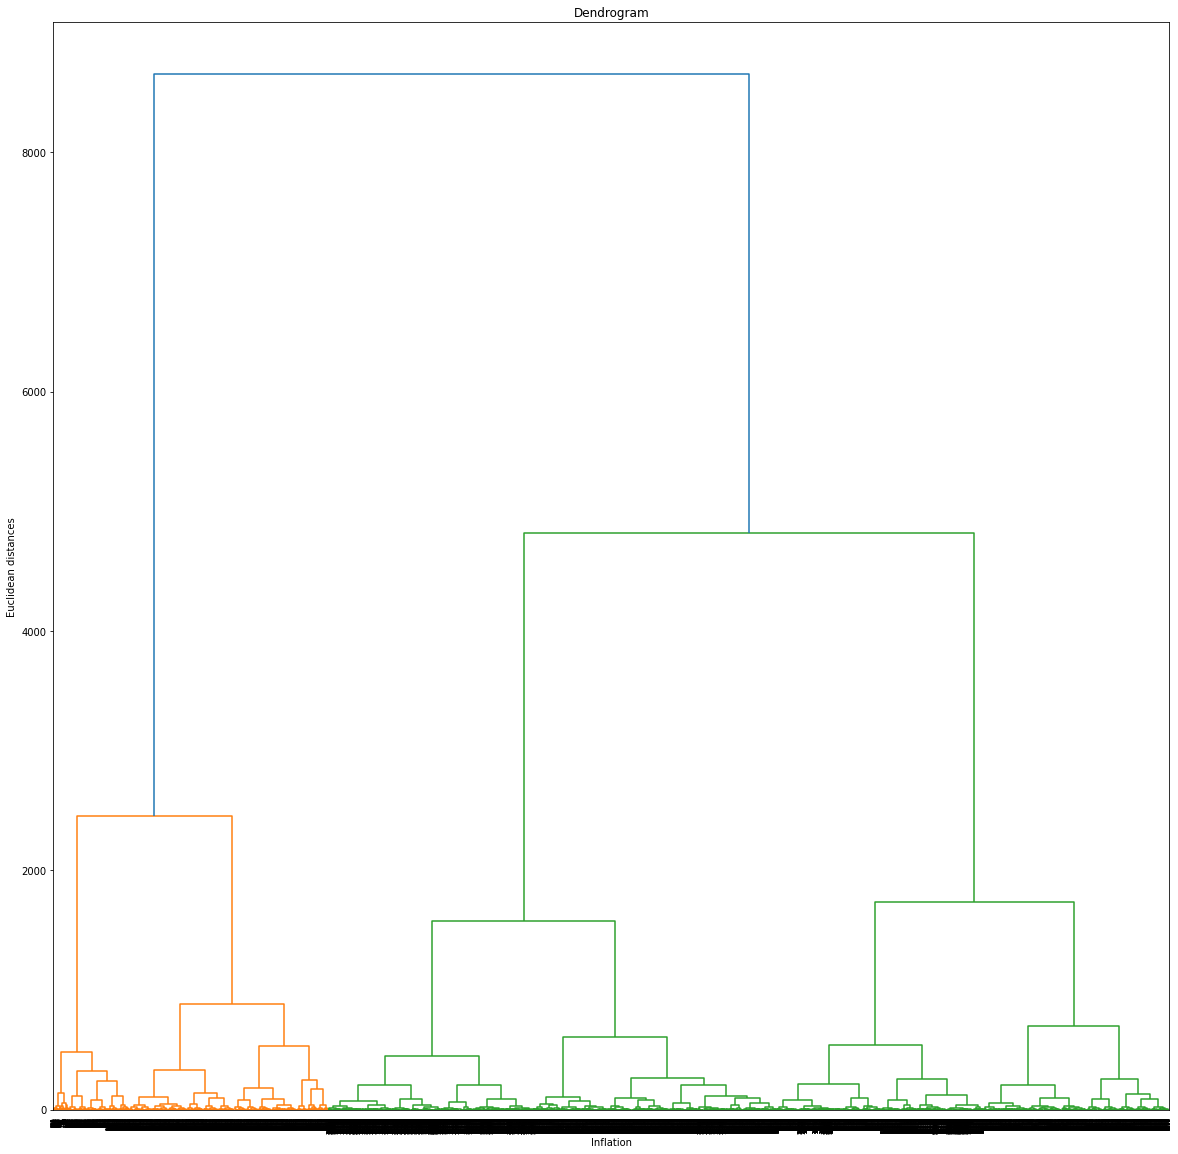

In [45]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 

X = pd.concat([features_df, y], axis=1)
plt.figure(figsize=(20,20))
plt.title('Dendrogram')
plt.xlabel('Inflation')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.show()

In [64]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X[1:18000][:])
labels = model.labels_

In [65]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [71]:
newData = X.loc[:, ['Real GDP (Percent Change)', 'CPI']].values
y_predict = model.fit_predict(newData)




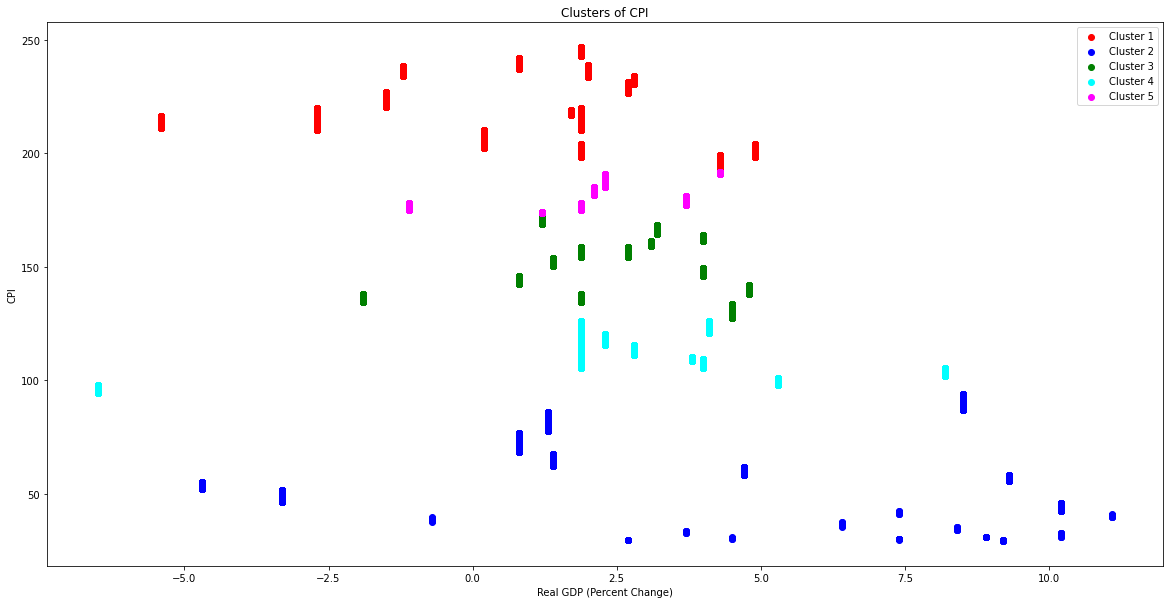

In [76]:
plt.figure(figsize=(20,10))
plt.scatter(newData[y_predict == 0, 0], newData[y_predict == 0, 1], c = 'red', label = 'Cluster 1') # plotting cluster 2
plt.scatter(newData[y_predict == 1, 0], newData[y_predict == 1, 1], c = 'blue', label = 'Cluster 2') # plotting cluster 3
plt.scatter(newData[y_predict == 2, 0], newData[y_predict == 2, 1], c = 'green', label = 'Cluster 3') # plotting cluster 4
plt.scatter(newData[y_predict == 3, 0], newData[y_predict == 3, 1], c = 'cyan', label = 'Cluster 4')  # plotting cluster 5
plt.scatter(newData[y_predict == 4, 0], newData[y_predict == 4, 1], c = 'magenta', label = 'Cluster 5')
# plot title addition
plt.title('Clusters of CPI')
# labelling the x-axis
plt.xlabel('Real GDP (Percent Change)')
# label of the y-axis
plt.ylabel('CPI')
# printing the legend
plt.legend()
# show the plot
plt.show()

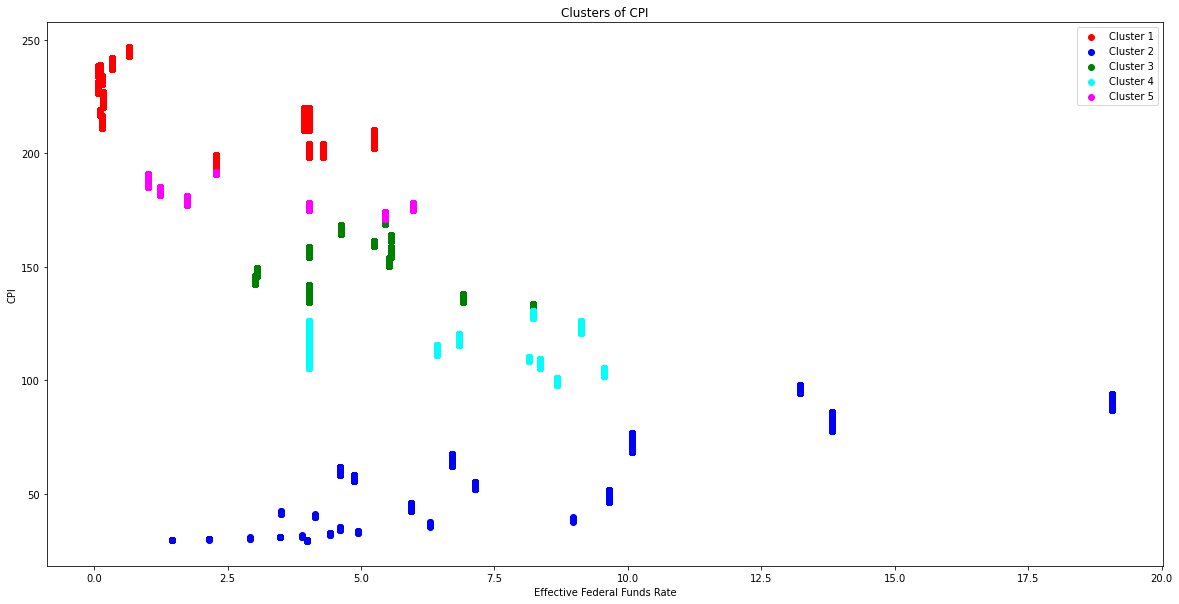

In [77]:
newData = X.loc[:, ['Effective Federal Funds Rate', 'CPI']].values
y_predict = model.fit_predict(newData)


plt.figure(figsize=(20,10))
plt.scatter(newData[y_predict == 0, 0], newData[y_predict == 0, 1], c = 'red', label = 'Cluster 1') # plotting cluster 2
plt.scatter(newData[y_predict == 1, 0], newData[y_predict == 1, 1], c = 'blue', label = 'Cluster 2') # plotting cluster 3
plt.scatter(newData[y_predict == 2, 0], newData[y_predict == 2, 1], c = 'green', label = 'Cluster 3') # plotting cluster 4
plt.scatter(newData[y_predict == 3, 0], newData[y_predict == 3, 1], c = 'cyan', label = 'Cluster 4')  # plotting cluster 5
plt.scatter(newData[y_predict == 4, 0], newData[y_predict == 4, 1], c = 'magenta', label = 'Cluster 5')
# plot title addition
plt.title('Clusters of CPI')
# labelling the x-axis
plt.xlabel('Effective Federal Funds Rate')
# label of the y-axis
plt.ylabel('CPI')
# printing the legend
plt.legend()
# show the plot
plt.show()